In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
torch.manual_seed(13);

In [3]:
train_data_len = 2**10 # 1024
train_data = torch.zeros((train_data_len, 2)) # create a tensor of 
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_len)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_len)
train_set = list(zip(train_data, train_labels))

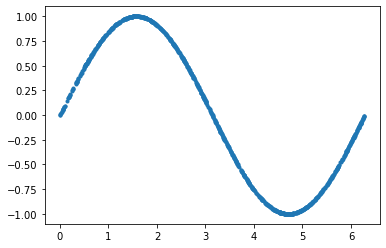

In [4]:
_ = plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [5]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )
        
    def forward(self, x):
            return self.model(x)
        

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )
        
    def forward(self, x):
        return self.model(x)

In [7]:
discriminator = Discriminator()
generator = Generator()

In [8]:
learning_rate = 0.001
epochs = 1000
loss_function = nn.BCELoss()

In [9]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=learning_rate)

In [10]:
for epoch in range(epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data fro training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )
        
        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()
        
        # Data fro training the generator
        latent_space_samples = torch.randn((batch_size, 2))
        
        # Training the generator 
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()
        
        # show loss 
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G: {loss_generator}")

Epoch: 0 Loss D: 0.1700953096151352
Epoch: 0 Loss G: 2.483372449874878
Epoch: 10 Loss D: 0.708126962184906
Epoch: 10 Loss G: 0.7990976572036743
Epoch: 20 Loss D: 0.5793453454971313
Epoch: 20 Loss G: 1.192010521888733
Epoch: 30 Loss D: 0.5822126269340515
Epoch: 30 Loss G: 0.9122335910797119
Epoch: 40 Loss D: 0.6466324925422668
Epoch: 40 Loss G: 0.9227622747421265
Epoch: 50 Loss D: 0.6459279656410217
Epoch: 50 Loss G: 0.8290835022926331
Epoch: 60 Loss D: 0.6966813206672668
Epoch: 60 Loss G: 0.7354122400283813
Epoch: 70 Loss D: 0.6891770958900452
Epoch: 70 Loss G: 0.8162459135055542
Epoch: 80 Loss D: 0.6857857704162598
Epoch: 80 Loss G: 0.7433096170425415
Epoch: 90 Loss D: 0.6757679581642151
Epoch: 90 Loss G: 0.7413464188575745
Epoch: 100 Loss D: 0.6832613945007324
Epoch: 100 Loss G: 0.6467213034629822
Epoch: 110 Loss D: 0.6188600659370422
Epoch: 110 Loss G: 0.9154543876647949
Epoch: 120 Loss D: 0.6736094951629639
Epoch: 120 Loss G: 0.7703886032104492
Epoch: 130 Loss D: 0.7878759503364563

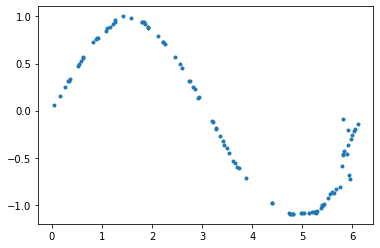

In [11]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.detach()
_ = plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")